# Лабораторная работа №5
# Выполнил студент группы БСТ2002 Демидов Константин Сергеевич
## Необходимо построить Кривую Серпинского, реализовать графический интерфейс, а также найти время каждой итерации

Время: 1 - Time: 0.0020008087158203125
Время: 2 - Time: 0.0019998550415039062
Время: 3 - Time: 0.002000570297241211
Время: 4 - Time: 0.002148151397705078
Время: 5 - Time: 0.0009980201721191406
Время: 6 - Time: 0.0010004043579101562
Время: 7 - Time: 0.0020003318786621094
Время: 8 - Time: 0.0010001659393310547
Время: 9 - Time: 0.0010001659393310547
Время: 10 - Time: 0.002000570297241211


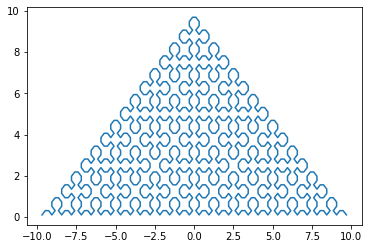

In [1]:
from matplotlib import pyplot
import time
import math


def rotate(origin, point, angle):
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return [qx, qy]


def shift(point, origin):
    return [point[0] - origin[0], point[1] + origin[1]]


def transformx(points):
    new = []
    for point in points:
        new.append([-point[0], point[1]])
    return new


def plot(points):
    x = []
    y = []
    for point in points:
        x.append(point[0])
        y.append(point[1])
    pyplot.plot(x, y)
    pyplot.show()


def curve(order, length):
    if order == 1:
        points = [[-length / 3, length / 3], [+length / 3, length / 3]]
        return points
    else:
        rotatedpoints = []
        shrinkedpoints = []
        finalpoints = []


        for point in curve(order - 1, length):
            shrinkedpoints.append([point[0] / (2 ** (1 / 2)), point[1] / (2 ** (1 / 2))])


        for point in shrinkedpoints:
            rotatedpoints.append(rotate((0, 0), point, math.radians(-135)))


        for point in rotatedpoints:
            finalpoints.append(shift(point, [length / 2, length / 2]))
        finalpoints = finalpoints[::-1] + transformx(finalpoints)

        return finalpoints

for i in range(1, 11):
    start = time.time()
    curve(10, 10)
    finish = time.time() - start
    print("Время: {} - Time: {}".format(i, finish))

plot(curve(10, 10))